# Température en fonction de la taille

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

### Chiot Mort taille S

In [30]:
data = pd.read_excel("DataChiot.xlsx")
del data['Diarr']
del data['hospit']
data

,Size,Died,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,S,1,37.5,37.5,37.5,37.8,37.7,37.8,37.3,37.9,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
1,S,0,37.4,37.8,37.3,37.8,37.8,37.6,37.3,37.3,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,S,0,37.3,37.5,37.6,37.5,37.4,37.5,37.7,37.7,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,S,0,37.3,37.8,36.9,37.9,37.5,37.7,37.7,37.7,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,NaN
4,S,0,37.4,37.5,37.1,37.7,37.4,37.2,37.7,37.6,...,38.3,38.3,38.7,38.6,39.1,37.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,M,0,37.8,37.6,37.3,37.5,38.4,37.9,37.9,37.1,...,38.3,37.9,38.3,38.8,38.7,38.9,38.5,37.8,38.5,38.4
163,M,0,37.2,NaN,37.1,37.8,37.7,37.8,37.9,37.2,...,38.8,38.8,37.9,38.1,38.4,38.9,38.2,38.9,38.5,38.1
164,M,0,37.4,37.5,37.2,37.7,37.5,37.6,37.7,36.8,...,38.7,38.4,36.8,38.1,38.2,38.9,38.8,38.6,38.2,38.3
165,S,0,37.2,37.1,37.4,37.4,37.5,37.9,37.7,37.4,...,38.5,38.0,38.3,38.4,38.5,38.4,38.4,38.9,38.9,38.1


In [31]:
data=data.query('Size == "S"')
data

,Size,Died,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,S,1,37.5,37.5,37.5,37.8,37.7,37.8,37.3,37.9,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
1,S,0,37.4,37.8,37.3,37.8,37.8,37.6,37.3,37.3,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,S,0,37.3,37.5,37.6,37.5,37.4,37.5,37.7,37.7,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,S,0,37.3,37.8,36.9,37.9,37.5,37.7,37.7,37.7,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,NaN
4,S,0,37.4,37.5,37.1,37.7,37.4,37.2,37.7,37.6,...,38.3,38.3,38.7,38.6,39.1,37.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,S,1,36.8,37.3,37.4,37.5,37.6,37.5,37.4,37.3,...,38.3,38.6,38.5,38.2,38.1,37.9,38.1,37.8,38.0,39.1
148,S,0,36.6,37.5,37.5,37.6,39.9,37.9,37.9,37.8,...,38.6,38.6,38.1,38.4,38.7,38.6,39.8,38.6,38.5,38.6
161,S,0,37.5,37.5,37.6,37.7,37.9,37.1,37.5,37.4,...,38.6,38.7,38.3,38.6,38.1,38.6,38.7,38.2,37.8,38.6
165,S,0,37.2,37.1,37.4,37.4,37.5,37.9,37.7,37.4,...,38.5,38.0,38.3,38.4,38.5,38.4,38.4,38.9,38.9,38.1


In [32]:
data = data.sort_values(by=['Died'], ascending=False)
data.head(20)

,Size,Died,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,S,1,37.5,37.5,37.5,37.8,37.7,37.8,37.3,37.9,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
9,S,1,37.7,37.3,36.7,37.3,37.7,37.4,37.5,37.2,...,37.6,37.8,39.4,39.4,37.6,37.8,34.8,35.9,NaN,NaN
72,S,1,37.8,37.6,37.6,37.4,37.7,37.8,38.2,38.1,...,38.5,38.4,38.3,38.5,38.6,39.0,39.2,39.3,38.4,NaN
140,S,1,36.9,37.3,37.6,37.6,37.7,38.0,37.6,37.5,...,38.2,38.2,38.2,38.0,37.6,38.6,38.1,38.1,37.8,38.6
147,S,1,36.8,37.3,37.4,37.5,37.6,37.5,37.4,37.3,...,38.3,38.6,38.5,38.2,38.1,37.9,38.1,37.8,38.0,39.1
125,S,1,37.4,37.6,37.4,37.7,37.5,37.5,37.2,37.8,...,37.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,S,1,37.4,37.3,37.5,37.7,37.9,37.8,37.7,37.4,...,38.6,38.3,38.9,38.3,40.2,NaN,NaN,NaN,NaN,NaN
99,S,0,37.7,37.8,37.6,37.8,37.7,37.6,37.8,38.0,...,38.8,38.4,38.8,38.0,38.7,37.9,38.2,38.1,38.2,39.0
100,S,0,37.3,37.5,37.1,37.2,37.7,37.8,37.8,37.6,...,38.3,39.6,38.6,38.5,38.4,38.0,37.1,38.4,38.3,39.1
101,S,0,37.3,37.5,37.5,37.6,37.7,37.8,37.9,37.8,...,38.2,37.9,37.8,38.7,37.7,38.6,38.2,39.1,38.6,37.8


In [33]:
del data['Size']
del data['Died']

In [34]:
data = np.array(data)

In [35]:
for i in range(0,70):
    for j in range(0,36):
        if(np.isnan(data[i,j])):
            data[i,j] = data[i,j-1]
data[0]

array([37.5, 37.5, 37.5, 37.8, 37.7, 37.8, 37.3, 37.9, 37.5, 37.7, 37.8,
       38.3, 38. , 38.1, 37.9, 38. , 37.8, 38.2, 38. , 38.5, 38.3, 37.7,
       38.4, 38.4, 38.8, 38.5, 38.4, 38.4, 38.2, 38.4, 38.9, 38.7, 38.5,
       38.7, 39. , 39. ])

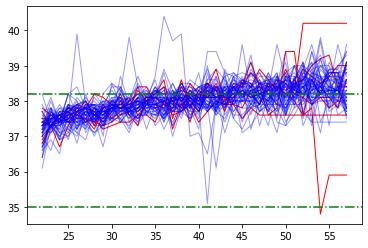

In [37]:
x = np.array(range(22, 58))
countSup=0
countInf=0
for i in range(0,70):
    countSup=0
    countInf=0
    y=data[i]
    for j in range(1,35):
        if(data[i,j]>=38.2 and data[i,j-1]>=38.2 and data[i,j+1]>=38.2):
            countSup+=1
        if(data[i,j]<36.1):
            countInf+=1
    if(countSup >=2 or countInf>=1):
        if(i<=6):
            plt.plot(x, y, color = "red", linewidth=1)
        else:
            plt.plot(x, y, color = "blue", linewidth=1, alpha=0.4)
plt.axhline(y=38.2, color='g', linestyle='-.')
plt.axhline(y=35, color='g', linestyle='-.')
plt.show()

## Chiot taille M

In [18]:
data = pd.read_excel("DataChiot.xlsx")
del data['Diarr']
del data['hospit']
data

,Size,Died,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,S,1,37.5,37.5,37.5,37.8,37.7,37.8,37.3,37.9,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
1,S,0,37.4,37.8,37.3,37.8,37.8,37.6,37.3,37.3,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,S,0,37.3,37.5,37.6,37.5,37.4,37.5,37.7,37.7,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,S,0,37.3,37.8,36.9,37.9,37.5,37.7,37.7,37.7,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,NaN
4,S,0,37.4,37.5,37.1,37.7,37.4,37.2,37.7,37.6,...,38.3,38.3,38.7,38.6,39.1,37.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,M,0,37.8,37.6,37.3,37.5,38.4,37.9,37.9,37.1,...,38.3,37.9,38.3,38.8,38.7,38.9,38.5,37.8,38.5,38.4
163,M,0,37.2,NaN,37.1,37.8,37.7,37.8,37.9,37.2,...,38.8,38.8,37.9,38.1,38.4,38.9,38.2,38.9,38.5,38.1
164,M,0,37.4,37.5,37.2,37.7,37.5,37.6,37.7,36.8,...,38.7,38.4,36.8,38.1,38.2,38.9,38.8,38.6,38.2,38.3
165,S,0,37.2,37.1,37.4,37.4,37.5,37.9,37.7,37.4,...,38.5,38.0,38.3,38.4,38.5,38.4,38.4,38.9,38.9,38.1


In [19]:
data=data.query('Size == "M"')
data

,Size,Died,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
45,M,1,37.3,37.0,37.6,37.8,37.6,37.1,36.8,36.8,...,38.0,38.6,38.2,38.1,38.7,38.8,38.8,NaN,NaN,NaN
46,M,0,37.1,37.1,37.6,37.6,37.8,37.4,37.6,37.3,...,37.8,38.9,38.4,38.1,38.1,38.9,38.5,38.5,38.8,38.7
47,M,0,37.2,37.0,37.7,37.4,37.3,37.7,37.5,36.7,...,38.6,38.7,38.3,38.5,38.3,38.4,38.9,38.4,40.2,39.0
48,M,0,36.9,37.0,37.3,37.3,37.6,37.3,37.2,37.6,...,38.0,38.6,38.5,38.0,38.1,38.9,36.6,38.5,38.7,NaN
49,M,0,37.4,37.7,37.8,37.1,37.3,37.6,37.4,37.4,...,38.0,38.6,38.5,38.3,38.3,39.0,38.8,38.5,39.7,39.5
50,M,0,37.7,37.4,37.6,37.4,37.6,37.4,37.1,36.8,...,38.1,38.8,39.0,38.6,38.6,38.2,39.1,38.2,39.0,38.1
51,M,0,37.0,37.5,37.6,37.4,37.9,37.3,37.4,36.9,...,37.6,38.1,38.5,38.4,37.9,39.0,38.4,38.1,38.1,39.3
52,M,0,37.1,37.0,37.0,37.3,37.4,37.3,37.2,36.9,...,37.4,38.2,38.7,38.3,38.1,38.7,38.9,38.5,38.3,39.3
53,M,1,37.1,37.2,37.6,37.6,37.6,37.4,NaN,37.1,...,38.4,38.6,39.0,38.6,37.8,38.6,38.5,39.5,39.3,38.8
60,M,0,37.1,37.3,37.3,37.5,38.0,37.8,37.9,37.9,...,38.5,38.4,38.2,38.4,37.4,NaN,NaN,NaN,NaN,NaN


In [21]:
data = data.sort_values(by=['Died'], ascending=False)
data.head()

,Size,Died,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
45,M,1,37.3,37.0,37.6,37.8,37.6,37.1,36.8,36.8,...,38.0,38.6,38.2,38.1,38.7,38.8,38.8,NaN,NaN,NaN
53,M,1,37.1,37.2,37.6,37.6,37.6,37.4,NaN,37.1,...,38.4,38.6,39.0,38.6,37.8,38.6,38.5,39.5,39.3,38.8
47,M,0,37.2,37.0,37.7,37.4,37.3,37.7,37.5,36.7,...,38.6,38.7,38.3,38.5,38.3,38.4,38.9,38.4,40.2,39.0
48,M,0,36.9,37.0,37.3,37.3,37.6,37.3,37.2,37.6,...,38.0,38.6,38.5,38.0,38.1,38.9,36.6,38.5,38.7,NaN
49,M,0,37.4,37.7,37.8,37.1,37.3,37.6,37.4,37.4,...,38.0,38.6,38.5,38.3,38.3,39.0,38.8,38.5,39.7,39.5


In [22]:
del data['Size']
del data['Died']
data = np.array(data)

In [24]:
for i in range(0,30):
    for j in range(0,36):
        if(np.isnan(data[i,j])):
            data[i,j] = data[i,j-1]
data[0]

array([37.3, 37. , 37.6, 37.8, 37.6, 37.1, 36.8, 36.8, 37.2, 37.7, 38.1,
       37.9, 37.7, 37.5, 37.9, 37.8, 38.5, 38. , 38. , 38.5, 38.1, 38.1,
       38.4, 37.6, 39.2, 37.7, 38. , 38.6, 38.2, 38.1, 38.7, 38.8, 38.8,
       38.8, 38.8, 38.8])

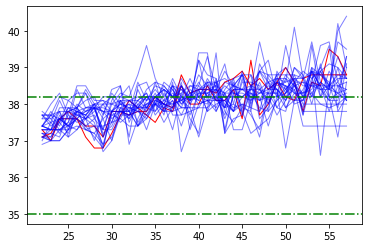

In [28]:
x = np.array(range(22, 58))
countSup=0
countInf=0
for i in range(0,30):
    countSup=0
    countInf=0
    y=data[i]
    for j in range(1,35):
        if(data[i,j]>=38.2 and data[i,j-1]>=38.2 and data[i,j+1]>=38.2):
            countSup+=1
        if(data[i,j]<36.1):
            countInf+=1
    if(countSup >=2 or countInf>=1):
        if(i<=1):
            plt.plot(x, y, color = "red", linewidth=1)
        else:
            plt.plot(x, y, color = "blue", linewidth=1, alpha=0.5)
plt.axhline(y=38.2, color='g', linestyle='-.')
plt.axhline(y=35, color='g', linestyle='-.')
plt.show()

### Chiot Taille L

In [41]:
data = pd.read_excel("DataChiot.xlsx")
del data['Diarr']
del data['hospit']
data

,Size,Died,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,S,1,37.5,37.5,37.5,37.8,37.7,37.8,37.3,37.9,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
1,S,0,37.4,37.8,37.3,37.8,37.8,37.6,37.3,37.3,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,S,0,37.3,37.5,37.6,37.5,37.4,37.5,37.7,37.7,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,S,0,37.3,37.8,36.9,37.9,37.5,37.7,37.7,37.7,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,NaN
4,S,0,37.4,37.5,37.1,37.7,37.4,37.2,37.7,37.6,...,38.3,38.3,38.7,38.6,39.1,37.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,M,0,37.8,37.6,37.3,37.5,38.4,37.9,37.9,37.1,...,38.3,37.9,38.3,38.8,38.7,38.9,38.5,37.8,38.5,38.4
163,M,0,37.2,NaN,37.1,37.8,37.7,37.8,37.9,37.2,...,38.8,38.8,37.9,38.1,38.4,38.9,38.2,38.9,38.5,38.1
164,M,0,37.4,37.5,37.2,37.7,37.5,37.6,37.7,36.8,...,38.7,38.4,36.8,38.1,38.2,38.9,38.8,38.6,38.2,38.3
165,S,0,37.2,37.1,37.4,37.4,37.5,37.9,37.7,37.4,...,38.5,38.0,38.3,38.4,38.5,38.4,38.4,38.9,38.9,38.1


In [42]:
data=data.query('Size == "L"')
data

,Size,Died,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
5,L,0,37.3,37.6,37.5,38.0,37.4,38.1,38.0,37.9,...,37.9,38.0,38.5,38.4,38.1,37.6,38.2,38.2,38.4,38.6
6,L,0,37.7,37.4,37.6,38.3,37.9,38.0,37.8,37.5,...,37.9,38.4,38.2,38.2,37.9,37.6,38.0,38.0,37.8,37.2
7,L,0,37.9,37.9,37.3,37.9,37.4,37.8,37.4,37.3,...,37.5,37.4,38.3,38.3,38.4,38.2,38.6,NaN,38.7,37.6
8,L,0,38.0,37.7,37.6,38.1,37.6,37.8,37.6,37.8,...,37.2,38.0,38.0,38.1,38.0,38.0,38.1,37.6,36.8,37.6
15,L,0,37.6,37.3,37.1,37.9,38.1,38.2,37.8,38.1,...,NaN,38.0,37.8,37.4,38.3,38.0,38.0,38.2,38.4,37.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,L,0,37.2,37.2,37.7,38.0,38.0,37.1,37.8,37.7,...,38.2,37.9,38.4,38.7,37.9,38.8,38.2,38.4,39.0,38.7
155,L,0,37.5,37.7,37.5,38.1,38.0,37.8,38.3,37.8,...,37.8,38.4,38.0,38.9,38.1,38.4,38.1,38.2,38.1,38.3
156,L,0,37.5,37.7,37.8,38.2,38.0,37.6,37.8,37.9,...,38.0,37.8,38.3,38.8,38.1,38.5,38.5,38.6,38.9,38.3
157,L,0,37.5,37.7,37.7,37.8,38.0,37.2,37.9,37.5,...,37.7,38.7,38.0,38.6,38.2,38.3,38.3,38.1,37.8,38.8


In [45]:
data = data.sort_values(by=['Died'], ascending=False)
data.head(15)

,Size,Died,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
102,L,1,37.6,38.1,37.9,38.2,37.8,38.0,38.2,38.1,...,38.5,38.3,38.5,38.8,38.4,38.5,NaN,39.3,39.0,39.7
66,L,1,36.8,37.4,37.6,37.4,37.7,37.9,38.1,37.6,...,38.5,38.7,38.7,38.8,39.1,38.4,37.6,38.2,NaN,NaN
149,L,1,37.7,37.7,38.0,38.1,38.2,38.1,38.2,38.0,...,38.5,38.2,38.1,38.8,39.0,39.3,38.2,38.1,NaN,NaN
40,L,1,36.9,38.0,37.8,38.0,37.8,37.8,38.5,38.2,...,38.1,38.5,38.4,38.1,38.0,39.2,39.5,38.4,NaN,NaN
69,L,1,36.9,37.4,37.4,37.8,37.6,37.7,38.0,37.7,...,38.6,38.3,37.6,38.1,NaN,NaN,NaN,NaN,NaN,NaN
23,L,1,37.5,37.4,37.5,37.4,37.9,37.9,37.8,38.3,...,38.7,37.4,38.0,38.5,38.8,38.5,NaN,NaN,NaN,NaN
71,L,1,36.8,37.6,37.2,37.0,37.6,37.9,37.6,37.5,...,NaN,38.4,37.7,38.4,37.8,NaN,38.1,37.7,NaN,NaN
84,L,1,36.9,37.0,37.5,37.5,37.7,37.8,37.4,37.4,...,38.1,38.6,38.3,38.9,39.1,38.3,NaN,NaN,NaN,NaN
39,L,1,37.1,37.7,37.5,38.1,37.6,38.2,38.0,37.5,...,37.6,38.2,38.8,37.8,39.0,38.1,38.2,37.9,38.3,NaN
18,L,1,37.4,37.0,37.1,37.7,37.8,37.5,37.6,37.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
del data['Size']
del data['Died']
data = np.array(data)

In [48]:
for i in range(0,67):
    for j in range(0,36):
        if(np.isnan(data[i,j])):
            data[i,j] = data[i,j-1]
data[0]

array([37.6, 38.1, 37.9, 38.2, 37.8, 38. , 38.2, 38.1, 38. , 38. , 38.1,
       38.1, 38.4, 38.3, 38.7, 38.4, 38.4, 38.3, 38.4, 38.3, 38.4, 38.4,
       38.5, 38.4, 38.5, 38.1, 38.5, 38.3, 38.5, 38.8, 38.4, 38.5, 38.5,
       39.3, 39. , 39.7])

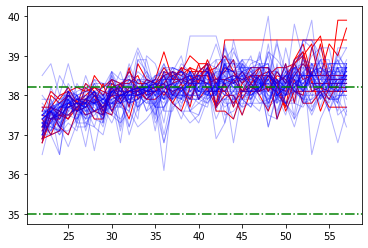

In [51]:
x = np.array(range(22, 58))
countSup=0
countInf=0
for i in range(0,67):
    countSup=0
    countInf=0
    y=data[i]
    for j in range(1,35):
        if(data[i,j]>=38.2 and data[i,j-1]>=38.2 and data[i,j+1]>=38.2):
            countSup+=1
        if(data[i,j]<36.1):
            countInf+=1
    if(countSup >=2 or countInf>=1):
        if(i<=10):
            plt.plot(x, y, color = "red", linewidth=1)
        else:
            plt.plot(x, y, color = "blue", linewidth=1, alpha=0.3)
plt.axhline(y=38.2, color='g', linestyle='-.')
plt.axhline(y=35, color='g', linestyle='-.')
plt.show()